# Running a simulation

In this script, I will try to run a simulation with the created unit cell, to determine if the format of the cell is the one expected by the program. 

In [1]:
import sys
import numpy as np
from importlib import reload  
import support as sup
reload(sup)
sys.path.insert(0, '../icenumerics')

import icenumerics as ice
from icenumerics.geometry import ordering 

import matplotlib.pyplot as plt
ureg = ice.ureg

Here, I'm trying to use the support.py file 

In [1]:
centers, directions = sup.unit_cell_Cairo(1)

NameError: name 'sup' is not defined

(-1.2606043953046409, 5.94325654244048, -3.5160661855746334, 3.687794752170488)

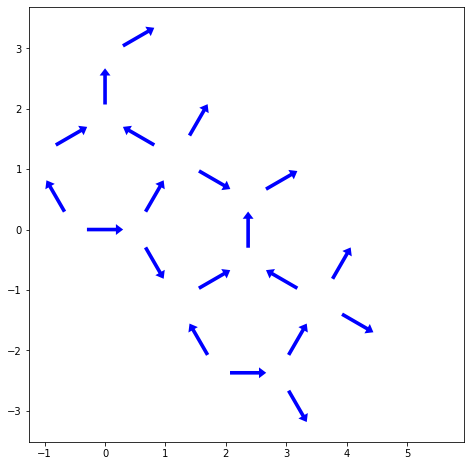

In [3]:
sp = ice.spins(centers = centers, directions = directions)

f, (ax1) = plt.subplots(1,1,figsize = (8,8))
sp.display(ax1)

plt.axis('square')

## Trying a dumb simulation

In [4]:
centers, directions = sup.unit_cell_Cairo(19.5458)
sp = ice.spins(centers = centers, directions = directions)

/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:61: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new[:,0] = centers_toAddX
/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:62: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new[:,1] = centers_toAddY


In [5]:
ureg = ice.ureg

In [6]:
particle = ice.particle(radius = 5*ureg.um,
             susceptibility = 0.1,
             diffusion = 0.125*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

trap = ice.trap(trap_sep = 10*ureg.um,
               height = 0.5*ureg.pN*ureg.nm,
               stiffness = 6e-4*ureg.pN/ureg.nm)

col = ice.colloidal_ice(sp, particle, trap, height_spread = 0, susceptibility_spread = 0.1)
col.pad_region(30*ureg.um)

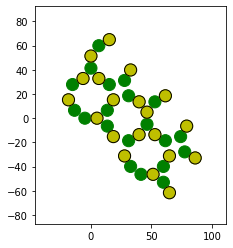

In [7]:
col.display()

In [8]:
world = ice.world(
    field = 10*ureg.mT,
    temperature = 300*ureg.K,
    dipole_cutoff = 200*ureg.um)

In [9]:
output = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-0.2"

In [10]:
col.simulate(world,
             name = "test_unit_cell",
             include_timestamp = False,
             targetdir = output,
             framerate = 1*ureg.Hz,
             timestep = 10*ureg.ms,
             run_time = 60*ureg.s,
             output = ["x","y","z","mux","muy","muz"])

scanning file


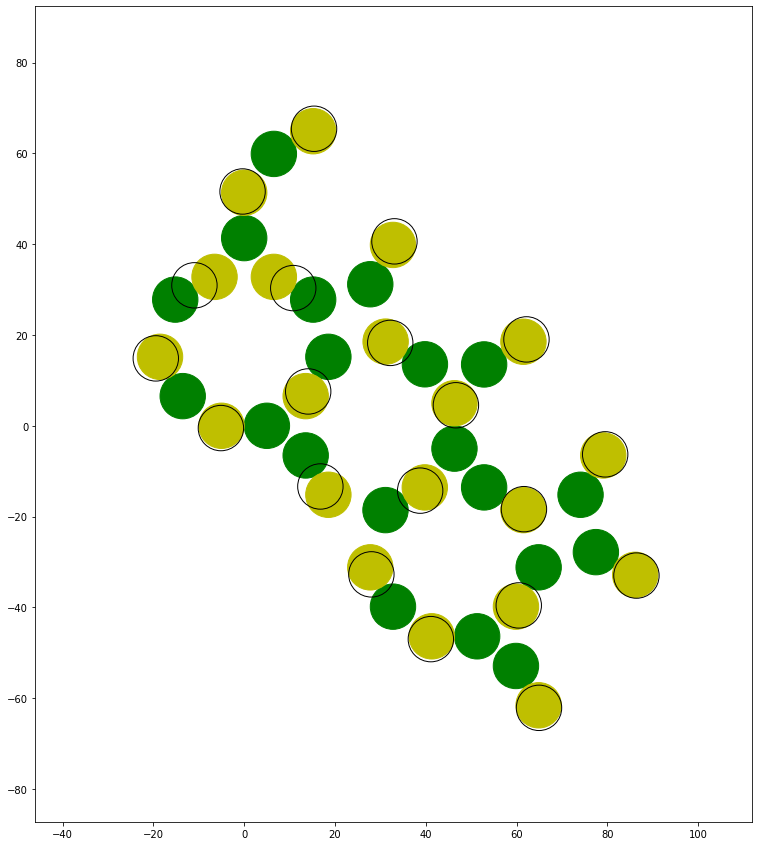

In [11]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
col.display(ax1)

In [12]:
col.load_simulation(slice(0,None,1))

scanning file


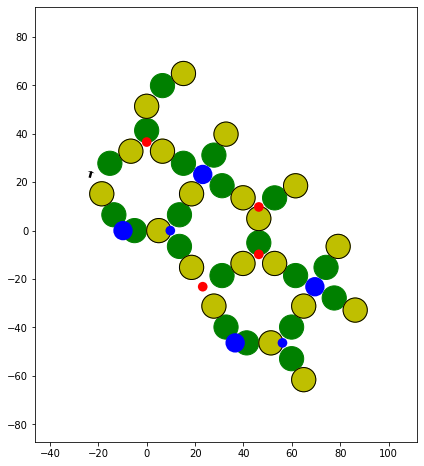

In [13]:
f, (ax1) = plt.subplots(1,1,figsize = (8,8))
v = ice.vertices()
col.set_state_from_frame(0)
v = v.colloids_to_vertices(col)

col.display(ax1)
v.display(ax1)

# Here I am trying a simulation but with a bigger lattice

I builded the function cairo_spin_ice_geometry in order to run a bigger simulations

In [1]:
import sys
import numpy as np
from importlib import reload  
import support as sup
reload(sup)
sys.path.insert(0, '../icenumerics')

import icenumerics as ice
from icenumerics.geometry import ordering 

import matplotlib.pyplot as plt
ureg = ice.ureg

In [2]:
sp = sup.spins()
ureg = ice.ureg
sp.create_lattice(geometry = "cairo",size =[4,4],lattice_constant=19.5458*ureg.um, border="closed spin")
sp.order_spins(ordering.random_ordering)


/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:62: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new[:,0] = centers_toAddX
/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:63: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new[:,1] = centers_toAddY
/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:170: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new_centers[:,1] = centersY


why I cannot see the spin lattice when I change the lattice constant??

(-35.03450332358818, 402.9928799870419, -355.5429721221873, 82.48441118844278)

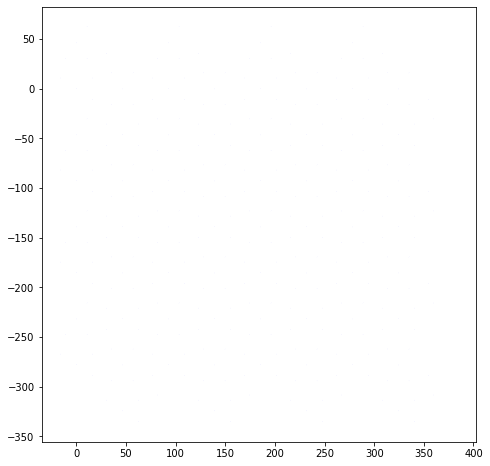

In [3]:
f, (ax1) = plt.subplots(1,1,figsize = (8,8))
sp.display(ax1)

plt.axis('square')

In [4]:
particle = ice.particle(radius = 5*ureg.um,
             susceptibility = 0.005,
             diffusion = 0.125*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

trap_long = ice.trap(trap_sep = 10*ureg.um,
               height = 1*ureg.pN*ureg.nm,
               stiffness = 6e-4*ureg.pN/ureg.nm)

trap_short = ice.trap(trap_sep = 4.5258*ureg.um,
               height = 1*ureg.pN*ureg.nm,
               stiffness = 6e-4*ureg.pN/ureg.nm)

traps = []

In [5]:
# < In this Kenrel I will define which traps have to be shorter > 

for s in sp:
    
    if ( s.direction[0].magnitude == 1.0 or s.direction[0].magnitude == -1.0 or 
        s.direction[1].magnitude == 1.0 or s.direction[1].magnitude == -1.0 ):
        
        traps.append(trap_short)
        
    else:
        
        traps.append(trap_long)

In [6]:
col = ice.colloidal_ice(sp, particle, traps, height_spread = 0, susceptibility_spread = 0.1)
col.pad_region(5*ureg.um)

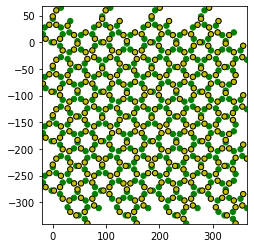

In [7]:
col.display()

In [8]:
world = ice.world(
    field = 10*ureg.mT,
    temperature = 300*ureg.K,
    dipole_cutoff = 200*ureg.um)

In [9]:
output = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-0.2"

In [10]:
col.simulate(world,
             name = "test_cairo_lattice",
             include_timestamp = False,
             targetdir = output,
             framerate = 1*ureg.Hz,
             timestep = 10*ureg.ms,
             run_time = 60*ureg.s,
             output = ["x","y","z","mux","muy","muz"])

scanning file


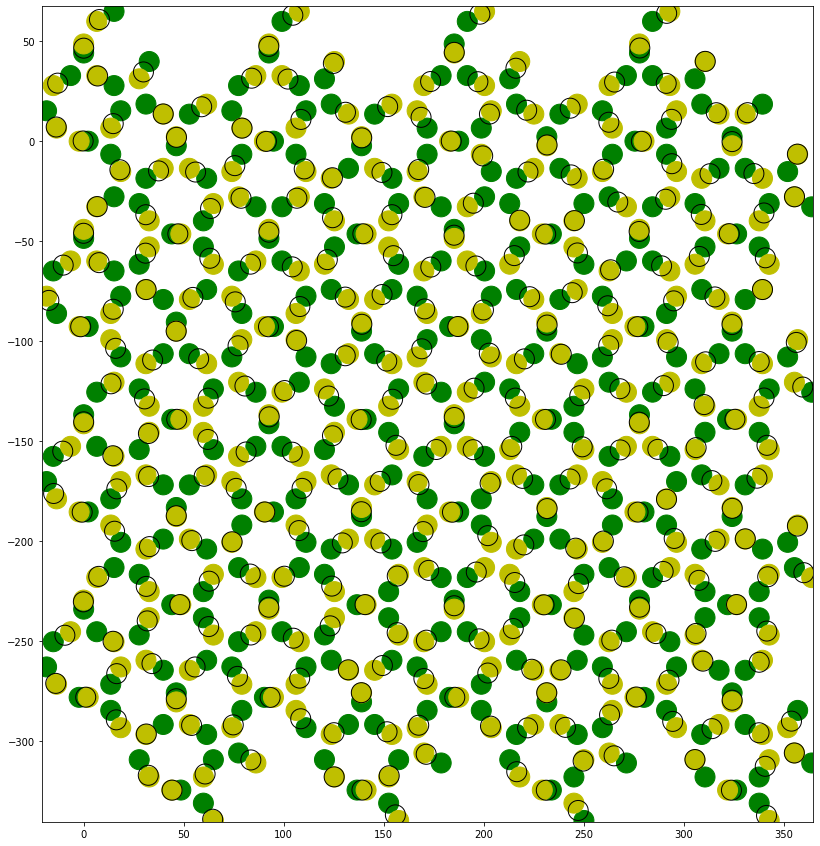

In [11]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
col.display(ax1)

In [25]:
col.load_simulation(slice(0,None,1))

scanning file


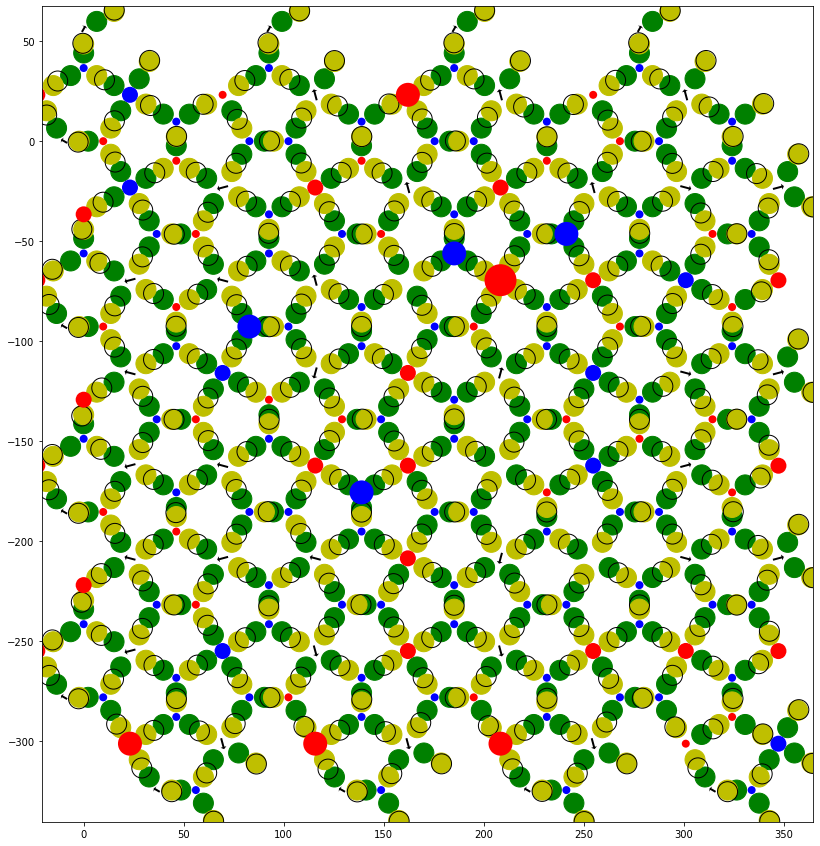

In [26]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
v = ice.vertices()
col.set_state_from_frame(60)
v = v.colloids_to_vertices(col)

col.display(ax1)
v.display(ax1)

In [ ]:
v.vertices

# Issues

    
    - When I expand the lattice duplicate points do not coincide exactly. 
        (Solution: define a unit cell that will not generate overlap).
        
<font color='red'> SOLVED! </font>

    - Some traps have to be shorter to have an homegeneous interparticle distance. 

<font color='red'> SOLVED! </font>    
    
    - Seems that the interparticle separation is not equal in the 4-fold vertex and 3-fold vertex.
        (Solution: centers in long traps are not in the center of the l edge).
        
 <font color='red'> SOLVED! </font>  
        
    - Missing a random seed (See Slack for solution).
    
 <font color='red'> I will solve it in other notebook </font>